### Recap

We developed the **Python** function below to return a numpy array of voltage values, after converting the readings from the Arduino to an appropriate numeric data-type. 

In [2]:
import numpy
import serial

def read_arduino(number_readings=1, data_type=numpy.float32, error_value=numpy.NaN,
                 serial_port='/dev/cu.usbmodem141301', baud_rate=9600, timeout=2, 
                 terminator='\r\n', startup_message='Yours sincerely, Arduino'): 
    '''
    Returns number_readings (default 1) voltage measurements from Arduino attached to 
    serial_port at baud_rate with specified timeout.
    Each voltage reading from Arduino should be terminated with terminator (string), and 
    it should give a suitable startup message (string).  
    Returns a numpy array of length number_readings, of type data_type. 
    Returns element with error_value if value cannot be converted to type data_type.
    '''
    if number_readings < 1: number_readings = 1 # need at least 1 reading!
    numeric_values = numpy.zeros((number_readings,), dtype=data_type)
    
    import serial
    with serial.Serial(port=serial_port, baudrate=baud_rate, timeout=timeout) as arduino:
        # Connect, and read until distinctive startup_message
        # Remember that exiting the 'with' block closes the connection automatically.
        arduino.read_until(startup_message.encode()) # string.encode() -> bytearray
        for i in range(number_readings): 
            value = arduino.read_until(terminator.encode()) # string.encode() -> bytearray
            try: # try to convert returned value to type data_type
                numeric_values[i] = data_type(value.decode().strip())
            except ValueError: # If we fail to convert data to type data_type, then
                numeric_values[i] = error_value # return error_value instead.
    return numeric_values

Remember to change the default value of `serial_port` to the correct value for your computer/Arduino combination!

In [3]:
voltages = read_arduino(number_readings=10)

print('voltages: ', voltages)

voltages:  [3.28 3.28 3.28 3.28 3.28 3.28 3.28 3.28 3.28 3.28]


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_signal(signal):
    '''
    Plots a graph of the numpy array 'signal'.
    '''
    mean = numpy.mean(signal) 
    std_error = numpy.std(signal)/numpy.sqrt(len(signal))
    
    plt.figure(figsize=(10,2))
    plt.plot(signal, marker='o', linestyle='none')
    plt.axhline(mean-std_error, color='r')
    plt.axhline(mean, color='k')
    plt.axhline(mean+std_error, color='r')
    plt.xlabel('Sample no.'); plt.ylabel('ADC0 voltage (V)')
    plt.show()

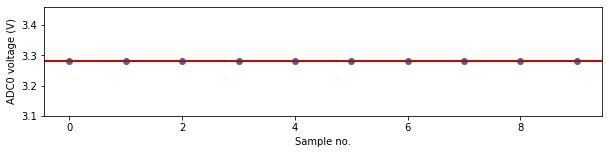

In [6]:
plot_signal(voltages)

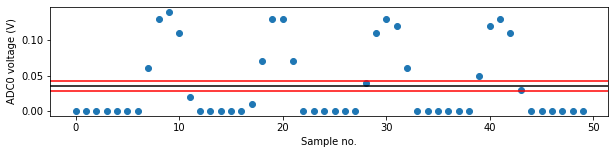

In [7]:
voltages = read_arduino(number_readings=50)
plot_signal(voltages)